In [44]:
import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Task 1. Загрузка файла
test=pd.read_csv("C:/Users/gordee-ext/OneDrive - Louis Dreyfus Company/Desktop/Netology/Задание 2/rosbank_test.csv")
train=pd.read_csv("C:/Users/gordee-ext/OneDrive - Louis Dreyfus Company/Desktop/Netology/Задание 2/rosbank_train.csv")

In [3]:
test.head(3)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category
0,01/04/2017,2,5814,NaN,810,18APR17:00:00:00,153.00,POS
1,01/03/2017,2,5812,NaN,810,10MAR17:00:00:00,388.08,POS
2,01/02/2017,2,5691,NaN,810,21FEB17:00:00:00,999.00,POS


In [4]:
train.head(3)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0


In [5]:
test.shape

(518376, 8)

In [6]:
train.shape

(490513, 10)

In [7]:
def get_aggregate_df(df, agg_type, col_to_groupby):
    agg_df=df[['cl_id',col_to_groupby, 'amount']].groupby(['cl_id',col_to_groupby]).agg([agg_type])
    agg_df=agg_df.unstack(fill_value=0)
    agg_df.columns=agg_df.columns.get_level_values(2)
    old_name=agg_df.columns.name
    old_cols=agg_df.columns
    new_cols=[old_name+'_'+agg_type+'_'+str(old_col) for old_col in old_cols]
    agg_df.rename(columns={old_col:new_col for old_col, new_col in zip(old_cols,new_cols)}, inplace=True)
    return agg_df

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518376 entries, 0 to 518375
Data columns (total 8 columns):
PERIOD          518376 non-null object
cl_id           518376 non-null int64
MCC             518376 non-null int64
channel_type    516222 non-null object
currency        518376 non-null int64
TRDATETIME      518376 non-null object
amount          518376 non-null float64
trx_category    518376 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 31.6+ MB


In [32]:
#Task 3. Агрегация данных и создание новых фич
#общая сумма транзакций по каждой из trx_category TEST

trx_cat_count_test=get_aggregate_df(test,'count','trx_category')
trx_cat_count_test.sum().sort_values(ascending = False).head(3)

trx_category
trx_category_count_POS           442149
trx_category_count_DEPOSIT        21870
trx_category_count_WD_ATM_ROS     19310
dtype: int64

In [36]:
#общая сумма транзакции по основным вылютам RUB-810, USD-840, EUR-978 TEST
currency_count_test=get_aggregate_df(test,'count','currency')
currency_count_test.sum().sort_values(ascending = False).head(3)

currency
currency_count_810    504087
currency_count_978      6037
currency_count_840      1887
dtype: int64

In [39]:
#общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). TEST
mcc_count_test=get_aggregate_df(test,'count','MCC')
mcc_count_test.sum().sort_values(ascending = False).head(3)

MCC
MCC_count_5411    129455
MCC_count_6011     55341
MCC_count_5814     43407
dtype: int64

In [40]:
#общая сумма транзакций по каждой из trx_category TRAIN
trx_cat_count_train=get_aggregate_df(train,'count','trx_category')
trx_cat_count_train.sum().sort_values(ascending = False).head(3)
#наиболее популярны POS и DEPOSIT

trx_category
trx_category_count_POS           416425
trx_category_count_DEPOSIT        21216
trx_category_count_WD_ATM_ROS     19104
dtype: int64

In [41]:
#общая сумма транзакции по основным вылютам RUB-810, USD-840, EUR-978  TRAIN
currency_count_train=get_aggregate_df(train,'count','currency')
currency_count_train.sum().sort_values(ascending = False).head(3)

currency
currency_count_810    477644
currency_count_978      5536
currency_count_840      1921
dtype: int64

In [42]:
#общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). TRAIN
mcc_count_train=get_aggregate_df(train,'count','MCC')
mcc_count_train.sum().sort_values(ascending = False).head(3)
#наиболее популярные МСС 5411, 6011, 5814

MCC
MCC_count_5411    121640
MCC_count_6011     54382
MCC_count_5814     41351
dtype: int64

In [43]:
print(test.describe())
test.mode().head(1)

               cl_id            MCC       currency        amount
count  518376.000000  518376.000000  518376.000000  5.183760e+05
mean     4783.074162    5691.949272     810.661423  5.510122e+03
std      2928.769547     663.012413      39.138519  4.480448e+04
min         2.000000     742.000000      32.000000  1.000000e-02
25%      2181.000000    5411.000000     810.000000  2.180000e+02
50%      4591.000000    5655.000000     810.000000  6.090000e+02
75%      7304.000000    5921.000000     810.000000  2.113000e+03
max     10216.000000    9405.000000     986.000000  1.825285e+07


,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category
0,01/07/2017,1614,5411,type1,810,30DEC16:00:00:00,1000.0,POS


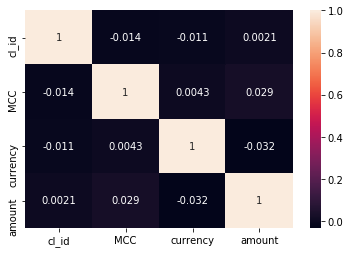

In [18]:
corr=test.corr()
sns.heatmap(corr,annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A82513358>,
      dtype=object)

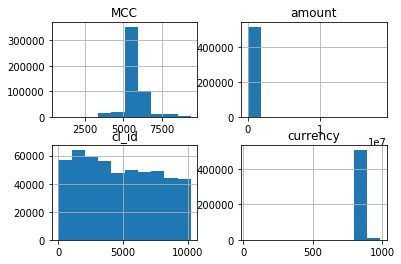

In [19]:
test.hist()